# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [151]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [115]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

count = 0
sets = 1

found_cities = []
latitudes = []
longitudes = []
temp_max = []
humidity=[]
clouds =[]
wind_speeds=[]
country= []
dates = [] 

print("Beginning Data Retrieval ")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url+ city).json()
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        found_cities.append(city)
        if count >49:
            count = 1
            sets +=1
            
        else:
            count +=1
        print(f" Processing Record {count} of Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete  ")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
 Processing Record 1 of Set 1 | dikson
 Processing Record 2 of Set 1 | scarborough
 Processing Record 3 of Set 1 | richards bay
 Processing Record 4 of Set 1 | ormara
City not found. Skipping...
 Processing Record 5 of Set 1 | punta arenas
 Processing Record 6 of Set 1 | tasiilaq
 Processing Record 7 of Set 1 | carutapera
 Processing Record 8 of Set 1 | nhulunbuy
City not found. Skipping...
 Processing Record 9 of Set 1 | khatanga
 Processing Record 10 of Set 1 | san pedro
 Processing Record 11 of Set 1 | sergeyevka
 Processing Record 12 of Set 1 | comodoro rivadavia
 Processing Record 13 of Set 1 | talnakh
 Processing Record 14 of Set 1 | san cristobal
 Processing Record 15 of Set 1 | tambilil
 Processing Record 16 of Set 1 | tovste
 Processing Record 17 of Set 1 | nome
 Processing Record 18 of Set 1 | bac lieu
 Processing Record 19 of Set 1 | hermanus
 Processing Record 20 of Set 1 | ishigaki
 Processing Record 21 of Set 1 | bil

 Processing Record 32 of Set 4 | tateyama
 Processing Record 33 of Set 4 | leningradskiy
 Processing Record 34 of Set 4 | cordoba
City not found. Skipping...
 Processing Record 35 of Set 4 | gigmoto
 Processing Record 36 of Set 4 | cassilandia
 Processing Record 37 of Set 4 | hofn
City not found. Skipping...
City not found. Skipping...
 Processing Record 38 of Set 4 | bathsheba
 Processing Record 39 of Set 4 | san quintin
 Processing Record 40 of Set 4 | aklavik
 Processing Record 41 of Set 4 | ourossogui
 Processing Record 42 of Set 4 | torres
 Processing Record 43 of Set 4 | kyritz
 Processing Record 44 of Set 4 | san patricio
 Processing Record 45 of Set 4 | naco
 Processing Record 46 of Set 4 | ambon
 Processing Record 47 of Set 4 | victoria
 Processing Record 48 of Set 4 | petropavlovsk-kamchatskiy
 Processing Record 49 of Set 4 | sola
 Processing Record 50 of Set 4 | abha
 Processing Record 1 of Set 5 | provideniya
 Processing Record 2 of Set 5 | makakilo city
 Processing Record 

 Processing Record 17 of Set 8 | mayahi
 Processing Record 18 of Set 8 | port-gentil
City not found. Skipping...
 Processing Record 19 of Set 8 | imeni poliny osipenko
 Processing Record 20 of Set 8 | show low
 Processing Record 21 of Set 8 | ciudad guayana
 Processing Record 22 of Set 8 | constitucion
 Processing Record 23 of Set 8 | valparaiso
 Processing Record 24 of Set 8 | mormugao
 Processing Record 25 of Set 8 | lavrentiya
 Processing Record 26 of Set 8 | chabahar
 Processing Record 27 of Set 8 | tiksi
 Processing Record 28 of Set 8 | xinan
 Processing Record 29 of Set 8 | hasaki
City not found. Skipping...
 Processing Record 30 of Set 8 | goundam
 Processing Record 31 of Set 8 | mapiripan
 Processing Record 32 of Set 8 | lesnica
City not found. Skipping...
 Processing Record 33 of Set 8 | clinton
 Processing Record 34 of Set 8 | najran
 Processing Record 35 of Set 8 | belyy yar
 Processing Record 36 of Set 8 | bielefeld
City not found. Skipping...
 Processing Record 37 of Set 8

 Processing Record 46 of Set 11 | bartica
 Processing Record 47 of Set 11 | anchorage
 Processing Record 48 of Set 11 | bilibino
 Processing Record 49 of Set 11 | dunedin
 Processing Record 50 of Set 11 | kontagora
 Processing Record 1 of Set 12 | sept-iles
 Processing Record 2 of Set 12 | batesville
 Processing Record 3 of Set 12 | ekhabi
 Processing Record 4 of Set 12 | balaipungut
 Processing Record 5 of Set 12 | auki
City not found. Skipping...
 Processing Record 6 of Set 12 | guanhaes
 Processing Record 7 of Set 12 | boyolangu
 Processing Record 8 of Set 12 | whitehorse
 Processing Record 9 of Set 12 | lebrija
 Processing Record 10 of Set 12 | atbasar
 Processing Record 11 of Set 12 | kismayo
 Processing Record 12 of Set 12 | maarianhamina
 Processing Record 13 of Set 12 | inhambane
 Processing Record 14 of Set 12 | muscat
 Processing Record 15 of Set 12 | kedrovyy
 Processing Record 16 of Set 12 | barcelos
 Processing Record 17 of Set 12 | souillac
 Processing Record 18 of Set 12

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [148]:
city_data = pd.DataFrame({"City": found_cities, "Lat": latitudes,\
                          "Lng": longitudes, "Max Temp":temp_max, "Humidity":humidity, "Cloudiness":clouds,\
                          "Wind Speed":wind_speeds, "Country":country, "Date":dates})
city_data.to_csv(output_data_file, index=False, header=True)

In [149]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,40.33,92,100,4.34,RU,1629672590
1,scarborough,54.2797,-0.4044,60.62,92,85,1.01,GB,1629672482
2,richards bay,-28.7830,32.0377,62.96,75,100,2.17,ZA,1629672590
3,ormara,25.2088,64.6357,78.39,89,46,11.10,PK,1629672590
4,punta arenas,-53.1500,-70.9167,37.51,93,90,10.36,CL,1629672591


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [121]:
more_100_humidity = city_data.loc[city_data['Humidity']>100]
print(more_100_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


In [22]:
#  Get the indices of cities that have humidity over 100%.


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

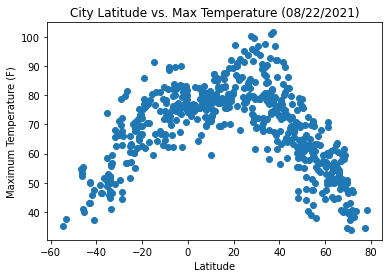

In [131]:
plt.scatter(city_data['Lat'], city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('City Latitude vs. Max Temperature (08/22/2021)')
plt.savefig('output_data/fig1.png')
plt.show()

## Latitude vs. Humidity Plot

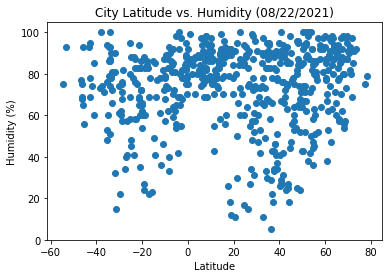

In [132]:
plt.scatter(city_data['Lat'], city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (08/22/2021)')
plt.yticks([ 0, 20,40,60,80,100])
plt.savefig('output_data/fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

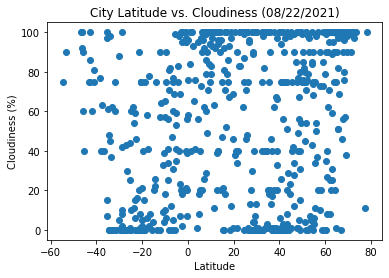

In [133]:

plt.scatter(city_data['Lat'], city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (08/22/2021)")
plt.savefig('output_data/fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

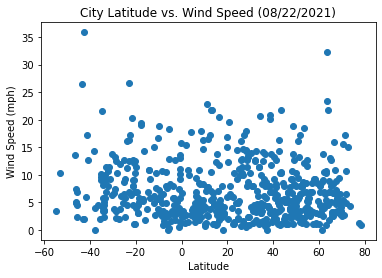

In [134]:
plt.scatter(city_data['Lat'], city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (08/22/2021)")
plt.savefig('output_data/fig4.png')
plt.show()

## Linear Regression

In [135]:
#make northern and southern hemisphere variables
north= city_data['Lat']>0
south = city_data['Lat']<0
north_hemisphere=city_data[north]
south_hemisphere=city_data[south]
print(north_hemisphere)

            City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0         dikson  73.5069   80.5464     40.33        92         100   
1    scarborough  54.2797   -0.4044     60.62        92          85   
3         ormara  25.2088   64.6357     78.39        89          46   
5       tasiilaq  65.6145  -37.6368     44.76        94          82   
8       khatanga  71.9667  102.5000     46.67        85         100   
..           ...      ...       ...       ...       ...         ...   
572       ossora  59.2353  163.0719     59.65        81          73   
577         asfi  32.2994   -9.2372     69.17        90           0   
578       monroe  43.1501  -77.6831     82.40        74          75   
579  vynohradove  46.3696   32.9398     67.64        57          34   
580  bandarbeyla   9.4942   50.8122     77.54        79          94   

     Wind Speed Country        Date  
0          4.34      RU  1629672590  
1          1.01      GB  1629672482  
3         11.10      PK  16296725

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

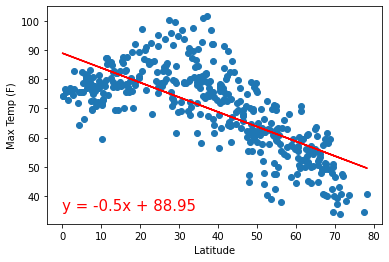

The r-value is : 0.5156245035261312


In [136]:
x_values_north = north_hemisphere['Lat']
y_values_north_temp = north_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_north, y_values_north_temp)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_temp)
plt.plot(x_values_north, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq, (0,35), fontsize=15, color = 'Red')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

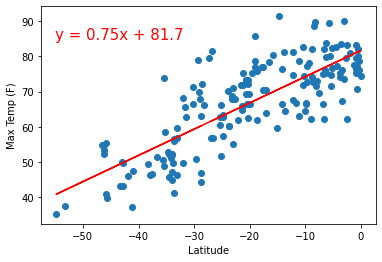

The r-value is : 0.6378955345298054


In [147]:
x_values_south = south_hemisphere['Lat']
y_values_south_temp = south_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_south , y_values_south_temp)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_temp)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-55,85), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

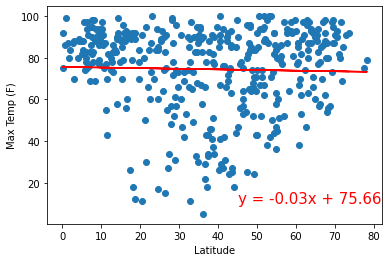

The r-value is : 0.000849039303936058


In [138]:
y_values_north_humid = north_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_north, y_values_north_humid)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_humid)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (45, 10), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

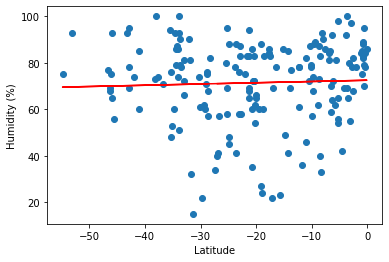

The r-value is : 0.0016666503899382904


In [139]:
y_values_south_humid = south_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_south , y_values_south_humid)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_humid)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

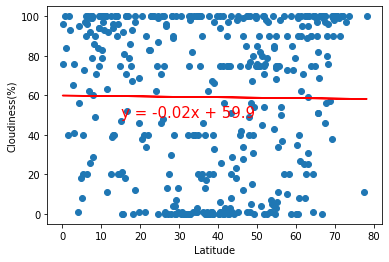

The r-value is : 0.00013360804558950706


In [140]:
y_values_north_cloud = north_hemisphere['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_north, y_values_north_cloud)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_cloud)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (15, 49), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

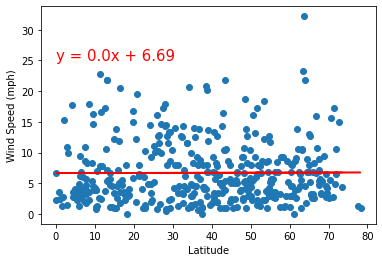

The r-value is : 9.545032935349776e-06


In [141]:
y_values_north_wind = north_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_north, y_values_north_wind)
regress_values = x_values_north *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_north, y_values_north_wind)
plt.plot(x_values_north, regress_values, "r-")
plt.annotate(line_eq, (0, 25), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is : {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

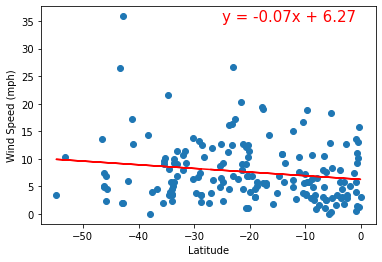

The r-value is : 0.02666259192168921


In [142]:

y_values_south_wind = south_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) =  linregress(x_values_south , y_values_south_wind)
regress_values = x_values_south  *slope +intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_south , y_values_south_wind)
plt.plot(x_values_south , regress_values, "r-")
plt.annotate(line_eq, (-25, 35), fontsize=15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()
print(f"The r-value is : {rvalue**2}")